# Intro to Unsupervised Machine Learning

**Lecturer**: Ashish Mahabal<br>
**Jupyter Notebook Author**: Francisco Förster Burón (CMM-U.Chile/MAS), modified by Ashish Mahabal.

This is a Jupyter notebook lesson extending the La Serena Data Science School 2018 and adapted for the NARIT-EACOA 2019 summer workshop.

## Objective
Introduce the user to unsupervised ML techniques using Python.

## Key steps
* Visualizations
* Clutsering of data in the absence of labels

## Required dependencies

Nominally, you should be able to install the python modules with `pip install <module>`.  The external astromatic packages are easiest installed using package managers (e.g., `rpm`, `apt-get`).

### Python modules
* python 3
* astropy
* numpy
* matplotlib
* scikit-learn

### External packages
None

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

- No labeled data available
- The goal is to discover "interesting structure" in the data
- Sometimes known as **knowledge discovery**.

More typical of human and animal learning. No expert to manually label the data is required.

*When we're learning to see, nobody's telling us what the right answers are - we just look. Every so often, your mother says "that's a dog", but that's very little information, You'd be lucky if you got a few bits of information - even one bit per second - that way. The brain's visual system has $10^{14}$ neural connections, And you only live for $10^9$ seconds. So it's no use learning one bit per second. You need more like $10^5$ bits per second. And there's only one place you can get that much information: from the input itself*, Geoffrey Hinton, 1996

# **Visualization**

### **Plotting libraries**

- matplotlib https://matplotlib.org/index.html
- Seaborn https://seaborn.pydata.org/
- Bokeh https://bokeh.pydata.org/en/latest/
- Highcharts https://www.highcharts.com/
- Altair https://altair-viz.github.io/

## **Visualizing many dimensions?**

**The iris dataset**: 4 dimensional dataset of flower characteristics

![](images/iris.png)

![](images/irises.png)

In [2]:
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

dfIris = sns.load_dataset("iris")
dfIris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
dfIris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### **Pair plot**

Plot all pairs of variables in NxN scatter plot matrix, histograms along diagonal

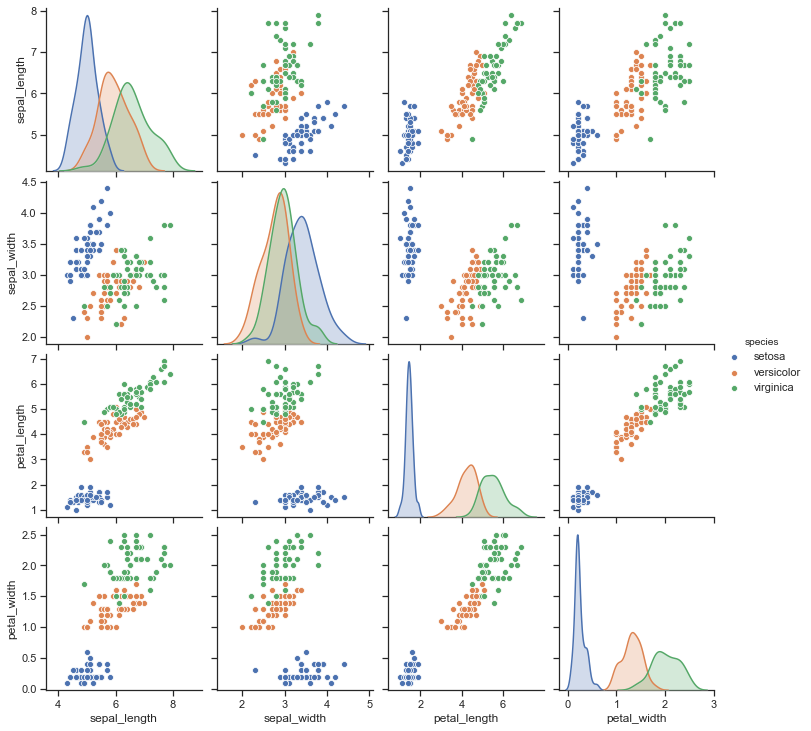

In [4]:
sns.pairplot(dfIris, hue="species")

### **Parallel coordinates**
Plot datapoints as lines

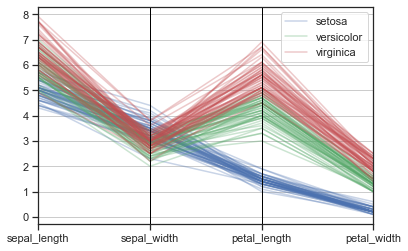

In [5]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(dfIris, 'species', color = ('b', 'g', 'r'), alpha = 0.3)

### **Andrews curves**

Points are Fourier series

### $f_x(t) = \frac{x_1}{\sqrt{2}} + x_2 \sin(t) + x_3 \cos(t) + x_4 \sin(2 t) + x_5 \cos(2 t) + ...$

and are plotted between $-\pi < t < \pi$

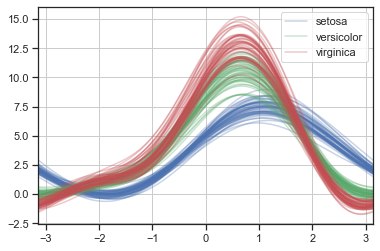

In [6]:
from pandas.plotting import andrews_curves
andrews_curves(dfIris, 'species', color = ('b', 'g', 'r'), alpha = 0.3)

### **RadViz**

- For D dimensions, D springs are attached to each point in a regular polygon of D sides
- Each spring has a stiffness proportional to the corresponding (normalized between 0 and 1) dimension value, and the point is placed where the sum of the forces is equal to zero

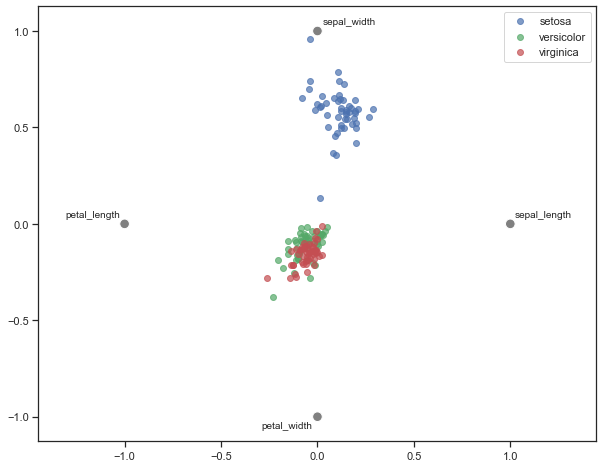

In [7]:
fig, ax = plt.subplots(figsize = (10, 8))
pd.plotting.radviz(dfIris, 'species', ax, color = ('b', 'g', 'r'), alpha = 0.7);

### Non negative Matrix Factorization (NMF)

Decompose positive valued data matrix as the product of two positive valued matrices

![](images/NMF.png)

**$V \in \mathbb{R}^{MxN}$**. Positive data matrix. It contains N samples and M dimensions (data points are columns).

**$W \in \mathbb{R}^{MxK}$**. Positive dictionaries matrix. Columns are the basis vectors or **prototypes**.

**$H \in \mathbb{R}^{KxN}$**. Positive coefficients matrix.

sometimes this is written as $V^T = H^T W^T$. It depends on how you present the data to the method.


This is achieved by minimizing the error function
### $\min\limits_{W,H}^{} || V - W H ||^2_F + \lambda ||H||_1,~~~~ s.t.~~~ W \ge 0, H \ge 0$

Note that $v_i = W h_i$, where $v_i$ is the i-th column vector of **V** and $h_i$ is the i-th column vector of **H**

![](images/NMF_Face.png)

<center> From https://archive.cnx.org/contents/e7ae2f9b-2809-47da-b7e5-6a5106d0386f@2/non-negative-matrix-factorization-nmf </center>

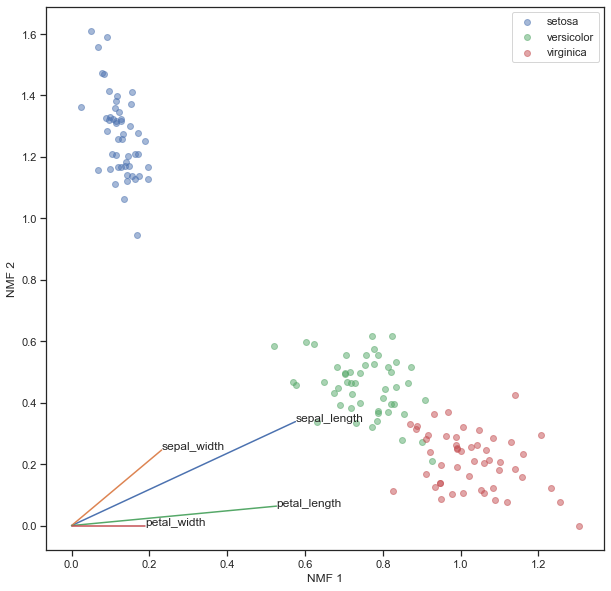

In [8]:
from sklearn import decomposition

iris = np.array(dfIris.drop(columns = ['species']))
species = dfIris['species']
iris_colors = {'setosa': 'b', 'versicolor': 'g', 'virginica': 'r'}

nmf = decomposition.NMF(n_components=2)
nmf.fit(iris)
iris_nmf = nmf.transform(iris)

# projected coordinates
fig, ax = plt.subplots(figsize = (10, 10))
for specie in np.unique(species):
    mask = (species == specie)
    ax.scatter(iris_nmf[mask][:, 0], iris_nmf[mask][:, 1], label = specie, c = iris_colors[specie], alpha = 0.5)

# loading vectors
basis = 0.1 * nmf.components_
for idx, var in enumerate(dfIris.columns[:-1]):
    ax.plot([0, basis[0, idx]], [0, basis[1, idx]])
    ax.text(basis[0, idx], basis[1, idx], var)

ax.set_xlabel("NMF 1")
ax.set_ylabel("NMF 2")
ax.legend(loc = 1);

# MNIST dataset

1797 handwritten digits, 8x8 images

In [9]:
from sklearn import datasets

digits = datasets.load_digits(n_class = 10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_samples, n_features

(1797, 64)

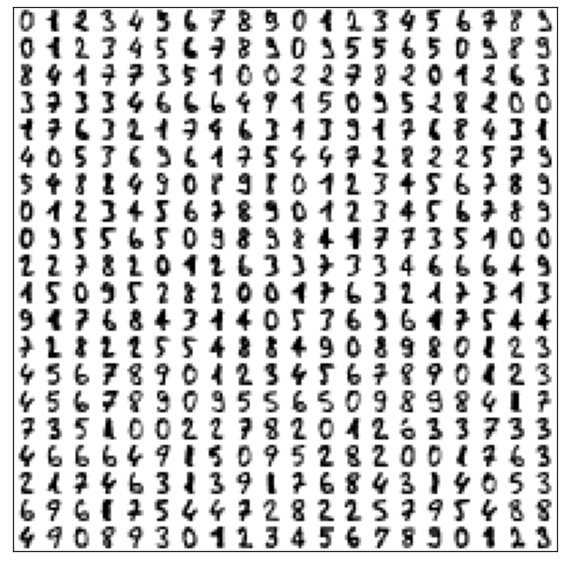

In [10]:
nrows = 20
fig, ax = plt.subplots(figsize = (10, 10))
img = np.zeros((10 * nrows, 10 * nrows))
for i in range(nrows):
    ix = 10 * i + 1
    for j in range(nrows):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * nrows + j].reshape((8, 8))
ax.imshow(img, plt.cm.binary)
plt.xticks([])
plt.yticks([]);

### MNIST + NMF

In [11]:
from matplotlib import offsetbox
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize = (10, 10))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    shown_images = np.array([[1., 1.]])  # just something big
    for i in range(digits.data.shape[0]):
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 4e-3:
            # don't show points that are too close
            continue
        shown_images = np.r_[shown_images, [X[i]]]
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
            X[i])
        ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

In [12]:
ndim = 2
nmf_model = decomposition.NMF(n_components = ndim)
nmf_model.fit(X)
mnist_nmf = nmf_model.transform(X)

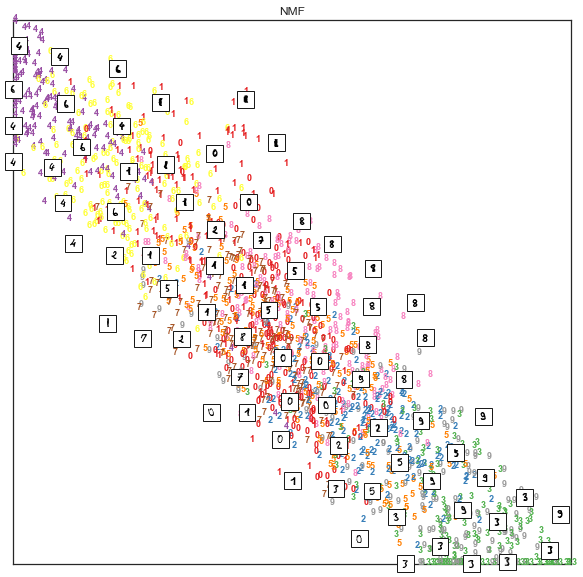

In [13]:
plot_embedding(mnist_nmf, "NMF")
plt.show()

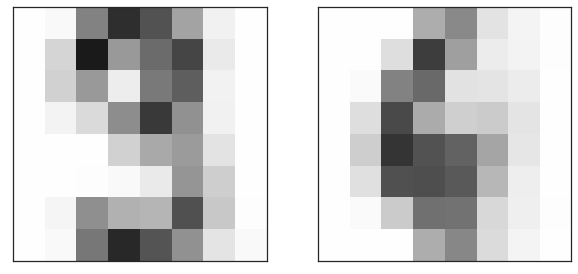

In [14]:
from matplotlib import colors

evNMF = nmf_model.components_
maxabs = np.max(evNMF.flatten())

fig, ax = plt.subplots(ncols = ndim, figsize = (10, 10))
# use divergent color scale, red is negative, gray is positive, white is zero
cmap = plt.cm.RdGy
norm = colors.Normalize(vmin = -maxabs, vmax = maxabs)
for i in range(ndim):
    im = evNMF[i].reshape((8, 8))
    ax[i].imshow(im, cmap = cmap, norm = norm)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

### t-distributed Stochastic Neighbor Embedding (t-SNE)

- Visualize high-dimensional data by giving each datapoint a location in a two or three-dimensional map.
- Variation of Stochastic Neighbor Embedding (Hinton & Roweis, 2002), faster and without crowding of points at the center of map 

### SNE (Hinton & Roweis, 2002):

* Convert high-dimensional dataset $X={x_1, ..., x_n}$ into two or three dimensional dataset $Y={y_1, ..., y_n}$ to be displayed as a scatter plot.

* Start by converting high-dimensional Euclidean distances between datapoints into conditional probabilities $p_{j|i}$. 

* $p_{j|i}$ is the probability of picking $x_j$ as its neighbor if picked from a Gaussian centered at $x_i$.

### $p_{j|i} = \frac{\exp(-||x_i - x_j||^2 / 2 \sigma_i^2)}{\sum_{k \ne i} \exp(-||x_i - x_k||^2 / 2 \sigma_i^2)}$

* Do the same for the low-dimensional counterparts (assume $\sigma_i = 1/\sqrt{2}$ for convenience):

### $q_{j|i} = \frac{\exp(-||y_i - y_j||^2)}{\sum_{k \ne i} \exp(-||y_i - y_k||^2)}$

* If the map points $y_i$ and $y_j$ correctly model the similarity between the high-dimensional datapoints $x_i$ and $x_j$, **the conditional probabilities $p_{j|i}$ and $q_{j|i}$ will be equal**.

* Use the Kullback-Leibler (KL) divergence between $P$ and $Q$ as the cost function!

![](images/KL.png)

The previous assumptions make the cost function very simple:


### $C = \sum_i KL(P_i || Q_i) = \sum_i \sum_j p_{j|i} \log \frac{p_{j|i}}{q_{j|i}}$

* Need to choose $\sigma_i$. Small values better for dense regions, large values better for sparse regions.

* The distribution $P_i$ has an increasing entropy as $\sigma_i$ increases. 
* The user defines $\sigma_i$ via setting **the perplexity** (which defines the entropy and indirectly $P_i$):

### $Perp(P_i) = 2^{H(P_i)} = 2^{-\sum\limits_j p_{j|i} \log_2 p_{j|i}}$

* this method has the problem that it tends to cluster points at the center of the map

### t-SNE (van der Maaten & Hinton, 2008)

1. instead of using the (asymmetric) conditional probabilities $p_{j|i}$ use the following symmetrized version (symmetric to exchange between $i$ and $j$)

### $p_{ij} = \frac{p_{j|i} + p_{i|j}}{2n}$

2. use Student t-distribution with one degree of freedom in the low-dimensional map (a heavy-tailed distribution). This pushes data points away from the centre in the mapped space.

### $q_{ij} = \frac{(1 + ||y_i - y_j||^2)^{-1}}{\sum_{k \ne l} (1 + ||y_k - y_l||^2)^{-1}}$

SNE and t-SNE have one **free parameter: the perplexity**, which is how well a probability distribution should predict the samples assuming the previous model.

## Iris dataset + t-SNE

In [15]:
from sklearn.manifold import TSNE

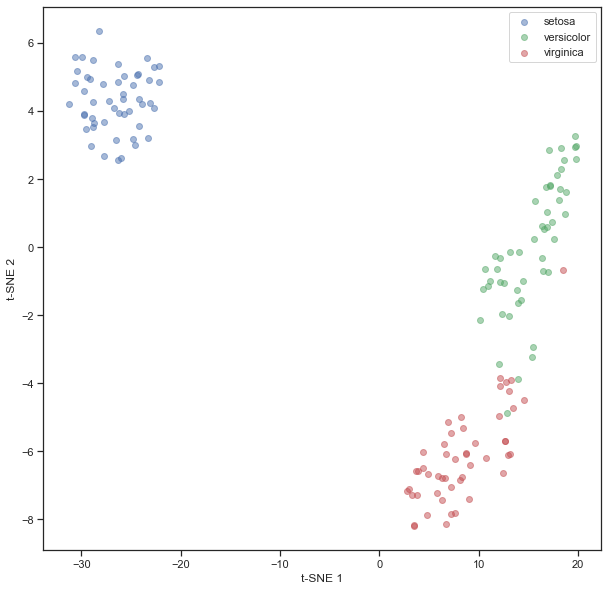

In [16]:
tsne_model = TSNE(n_components = 2, init = 'pca', perplexity = 25)
iris_tsne = tsne_model.fit_transform(iris)

fig, ax = plt.subplots(figsize = (10, 10), sharex = True)
for specie in np.unique(species):
    mask = (species == specie)
    ax.scatter(iris_tsne[mask][:, 0], iris_tsne[mask][:, 1], label = specie, c = iris_colors[specie], alpha = 0.5)
ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")
ax.legend();

### MNIST + t-SNE

In [17]:
tsne_model = TSNE(n_components = 2, init = 'pca', random_state = 0, perplexity = 10)
mnist_tsne = tsne_model.fit_transform(X)

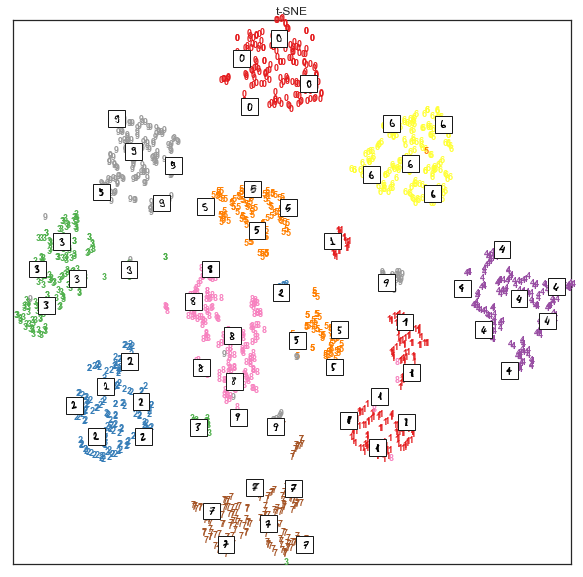

In [18]:
plot_embedding(mnist_tsne, "t-SNE")
plt.show()

![](images/tSNE_animation.gif)

# Clustering

See http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

![](images/clustering_comparison.png)

Clustering is the process of grouping similar objects together.

Two kinds of **inputs**:

1. **Similarity-based clustering**: input is an NxN **dissimilarity matrix** or **distance matrix D**.
2. **Feature-based clustering**: the input is an NxD feature matrix or design matrix **X**

Two types of **output**:

1. **flat clustering**, also called **partitional clustering**: objects are partitioned into disjoint sets

2. **Hierarchical clustering**: a nested tree of partitions is created

### Dissimilarity

The dissimilarity matrix **D** is a matrix where $d_{i,i} = 0$ and $d_{i, j} \ge 0$ is a measure of distance between objects i and j

Most common way to define dissimilarity is to use dissimilarity of attributes:

## $\Delta(x_i, x_{i'}) = \sum\limits_{j=1}^{D} \Delta(x_{ij}, x_{i'j})$


### Common dissimilarity functions:

* $\ell_2$ or squared (Euclidean) distance: 

###        $~~~~~~~~\Delta_j(x_{ij}, x_{i'j}) = (x_{ij} - x_{i'j})^2$

* $\ell_1$ or city block distance

###        $~~~~~~~~\Delta_j(x_{ij}, x_{i'j}) = |x_{ij} - x_{i'j}|$


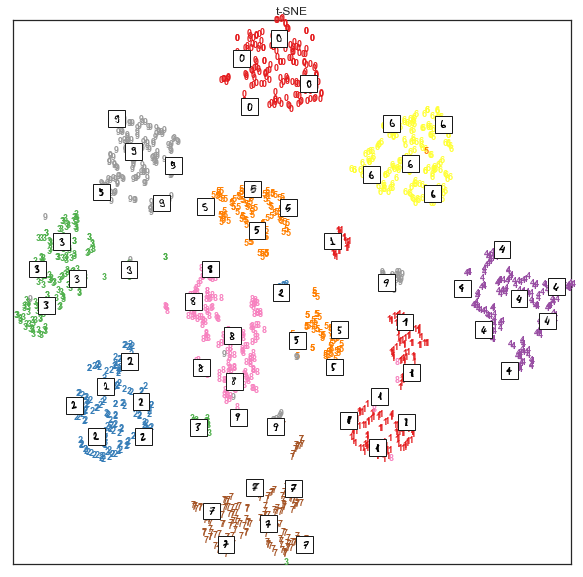

In [19]:
plot_embedding(mnist_tsne, "t-SNE")
plt.show()

# Mixture models

A mixture of distributions that represents the probability distribution of observations in the overall populations.

The probability of datapoint $x_i$ given some parameters $\theta$ is:

### $~~~~p(x_i|\theta) = \sum\limits_{k=1}^{K} \pi_k p_k(x_i|\theta)$

where $\pi_k$ is a categorical distribution and $p_k(x_i|\theta)$ is the probability of $x_i$ given that it belongs to the class $k$ and that it has parameters $\theta$. Also note that $\sum\limits_{k=1}^K \pi_k = 1$ and that $0 \le \pi_k \le 1$.

## Gaussian Mixture Model

In this model, each base distribution in the mixture is a multivariate Gaussian with mean $\mu_k$ and covariance matrix $\Sigma_k$:

### $~~~~p(x_i|\theta) = \sum\limits_{k=1}^{K} \pi_k N(x_i|\mu_k, \Sigma_k)$


See http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm.html#sphx-glr-auto-examples-mixture-plot-gmm-py

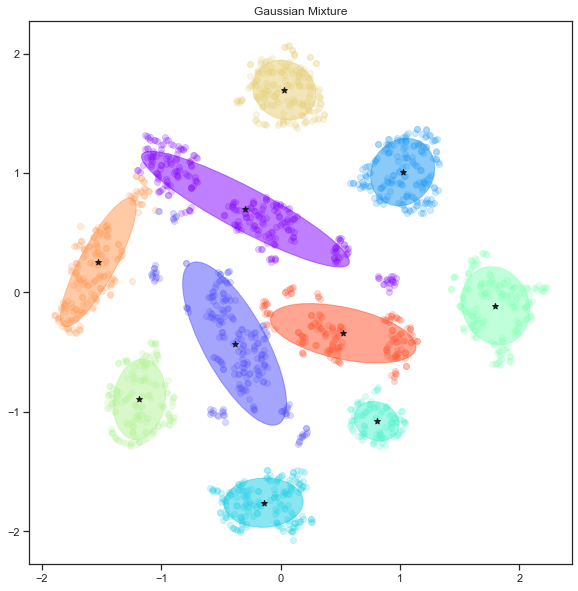

In [20]:
from sklearn import mixture
from scipy import linalg
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler

X = mnist_tsne # mnist_pca mnist_nmf
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(aspect = 1)
    for i, (mean, covar) in enumerate(zip(
            means, covariances)):
        color = cmap(norm(i))
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # show only predicted classes
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], color=color, alpha = 0.2)
        plt.scatter(mean[0], mean[1], c = 'k', zorder = 1000, marker = '*')

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    #plt.xticks(())
    #plt.yticks(())
    plt.title(title)

fig, ax = plt.subplots(figsize = (20, 10))
n_components = 10
GMM_model = mixture.GaussianMixture(n_components = n_components, covariance_type = 'full')
GMM_model.fit(X)
cmap = plt.cm.rainbow
norm = colors.Normalize(vmin=0, vmax=n_components)

    
plot_results(X, GMM_model.predict(X), GMM_model.means_, GMM_model.covariances_, 0,
             'Gaussian Mixture')

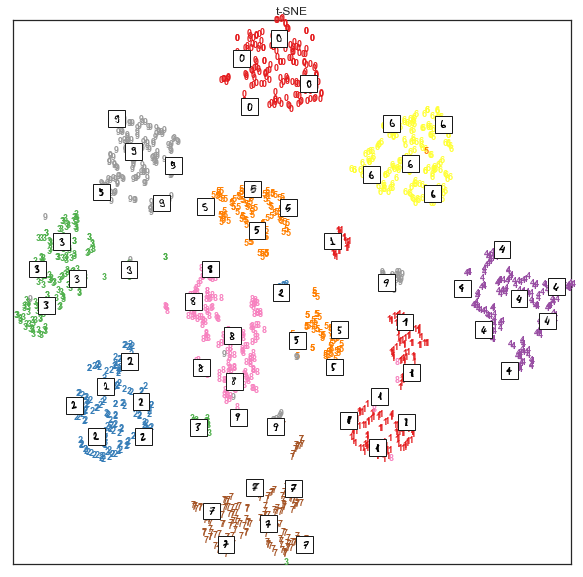

In [21]:
plot_embedding(mnist_tsne, "t-SNE")
plt.show()

### Using the Bayesian Information Criterion (BIC) to determine the number of clusters

### $~~~~BIC \equiv \log p({x}|\theta) - \frac{dof(\theta)}{2} \log N$ 

where $p({x}|\theta)$ is the probability of the data given the model parameters, $dof(\theta)$ is the number of parameters and $N$ is the number of points. The model with the minimum BIC is preferred.

See http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html

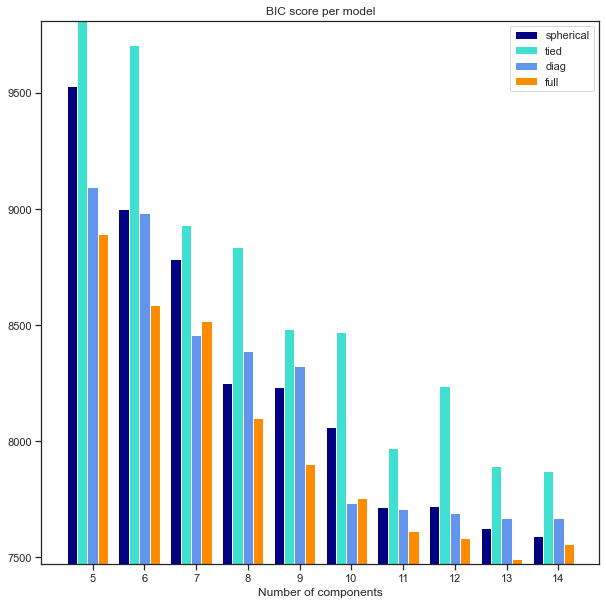

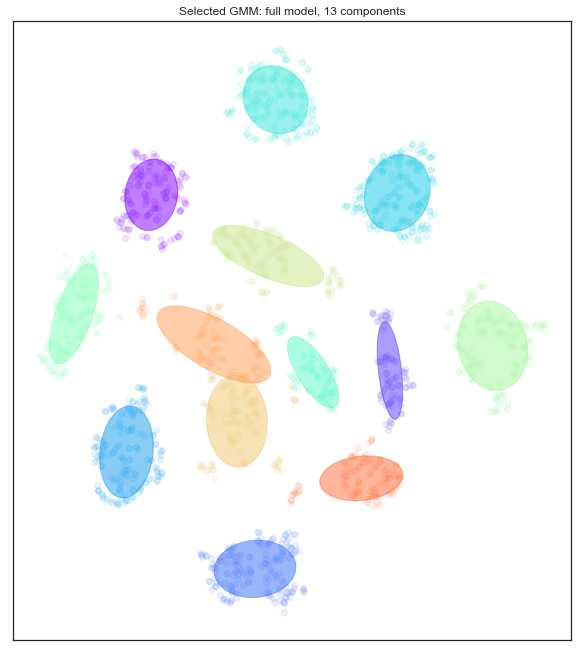

In [22]:
import itertools
from scipy import linalg

cmap = plt.cm.rainbow

X = mnist_tsne # mnist_pca mnist_nmf
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

lowest_bic = np.infty
bic = []
n_components_range = range(5, 15)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        try:
            gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
            gmm.fit(X)
        except:
            gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type, reg_covar = 1e-6)
            gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            best_cv_type = cv_type
            best_n_components = n_components
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
fig, ax = plt.subplots(figsize = (10, 10)) #spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(ax.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
ax.set_xlabel('Number of components')
ax.legend([b[0] for b in bars], cv_types)

# Plot the winner
fig, ax = plt.subplots(figsize = (10, 10))#splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(X)
norm = colors.Normalize(vmin=0, vmax=n_components_range[-1])

for i, (mean, cov) in enumerate(zip(clf.means_, clf.covariances_)):
    
    color = cmap(norm(i))
    
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], color=color, alpha = 0.1)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
    ell.set_clip_box(ax.bbox)
    ell.set_alpha(.5)
    ax.add_artist(ell) #splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title('Selected GMM: %s model, %s components' % (best_cv_type, best_n_components))
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.show()


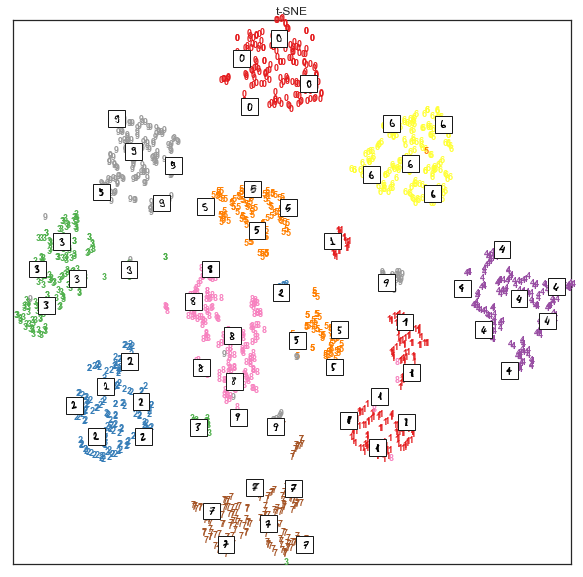

In [23]:
plot_embedding(mnist_tsne, "t-SNE")
plt.show()

## Variational Bayesian estimation of Gaussian Mixture

This method uses a Dirichlet distribution or a Dirichlet process for the distribution of weights.

Dirichlet distribution creates weights with the property that $\sum \pi_k = 1$ and $0 \le \pi_k \le 1$. It is parametrized by vector $\alpha$.

Dirichlet process allows for an infinite number of weights with the previous property. Also called **stick-breaking** process.

See http://www.cs.princeton.edu/courses/archive/fall11/cos597C/reading/BleiJordan2005.pdf


Text(0.5, 1.0, 'Lengths of Strings')

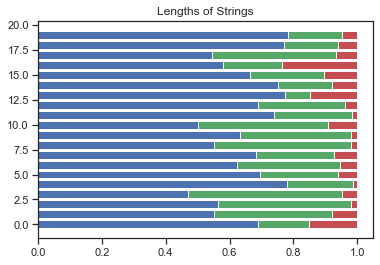

In [24]:
# Dirichlet distribution example
alpha = (10, 4, 1)
s = np.random.dirichlet(alpha, size = 20).transpose()
plt.barh(range(20), s[0])
plt.barh(range(20), s[1], left=s[0], color='g')
plt.barh(range(20), s[2], left=s[0]+s[1], color='r')
plt.title("Lengths of Strings")


Bayesian Gaussian Mixture converged, 12 clusters found


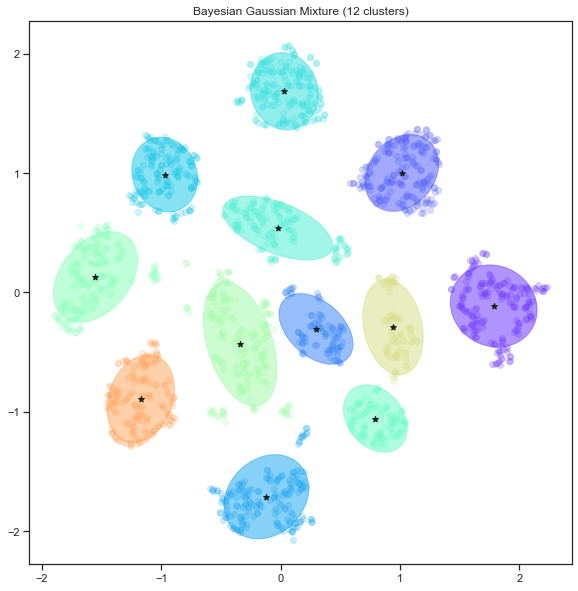

In [25]:
from sklearn import mixture

X = mnist_tsne # mnist_pca mnist_nmf
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

BGM_model = mixture.BayesianGaussianMixture(n_components = 18, covariance_type = 'full', reg_covar = 1e-4)
BGM_model.fit(X)

if BGM_model.converged_:
    print("Bayesian Gaussian Mixture converged, %i clusters found" % len(np.unique(BGM_model.predict(X))))
    fig, ax = plt.subplots(figsize = (10, 10))
    cmap = plt.cm.rainbow
    norm = colors.Normalize(vmin=0, vmax=len(BGM_model.means_))
    plot_results(X, BGM_model.predict(X), BGM_model.means_, BGM_model.covariances_, 0,
             'Bayesian Gaussian Mixture (%i clusters)' % len(np.unique(BGM_model.predict(X))))
else:
    print("Bayesian Gaussian Mixture didn't converge")
    


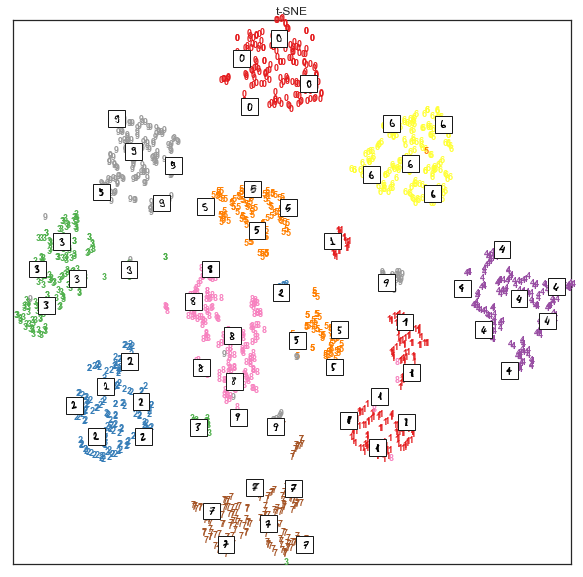

In [26]:
plot_embedding(mnist_tsne, "t-SNE")
plt.show()

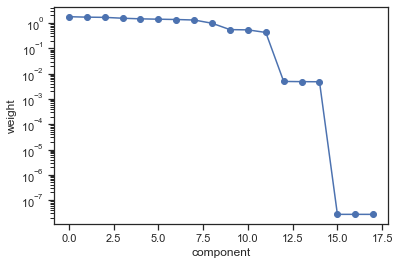

In [27]:
fig, ax = plt.subplots()
absmean = np.sqrt(BGM_model.means_[:, 0]**2 + BGM_model.means_[:, 1]**2)
ax.plot(sorted(absmean)[::-1], marker = 'o')
ax.set_xlabel('component')
ax.set_ylabel('weight')
ax.set_yscale('log')

# DBSCAN

Density-based spatial clustering of applications with noise (DBSCAN)

* Given a set of points in some space, group together points that are closely packed and mark as outliers in low-density regions

* One of the most common clustering algorithms

* Consider a set of points in some space to be clustered. The points are classified as core or outlier points as follows:

1. a point $p$ is a core if at least $minpts$ points are within distance $\epsilon$. 
2. a point $q$ is directly reachable from $p$ if point $q$ is within distance $\epsilon$ from point $p$.
3. a point $q$ is reachable from $p$ if there is a path $p_1, ... p_n$ with $p_1 = p$ and $p_n = q$ where each $p_{i+1}$ is directly reachable from $p_i$ (all points on the path must be core point, with the possible exception of $q$).
4. all points not reachable from any other point are outliers

![](images/DBSCAN.png)

See http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

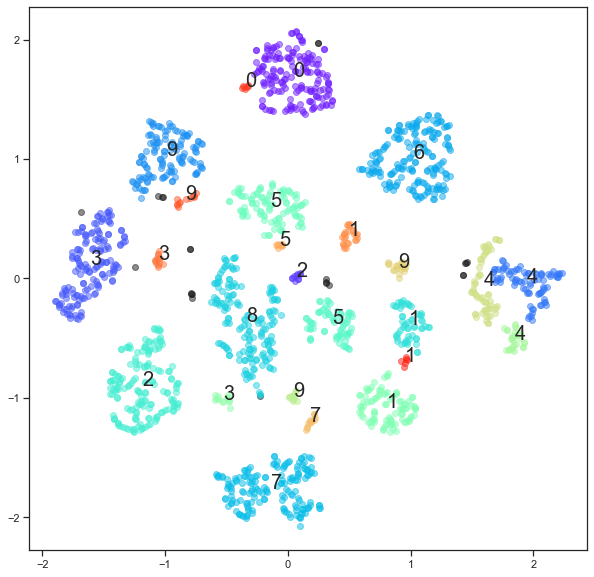

In [28]:
from sklearn.cluster import DBSCAN
from statistics import mode

X = mnist_tsne # mnist_pca mnist_nmf
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
fig, ax = plt.subplots(figsize = (10, 10))
DBSCAN_model = DBSCAN(eps = .1, min_samples = 6, metric='euclidean', \
                      metric_params=None, algorithm='auto', leaf_size=30)
DBSCAN_model.fit(X)
labels = np.array(DBSCAN_model.labels_)
cmap = plt.cm.rainbow
norm = colors.Normalize(vmin=0, vmax=len(np.unique(labels)))
for idx, label in enumerate(np.unique(labels)):
    mask= label == labels
    c = cmap(norm(idx))
    t = int(np.median(digits.target[mask]))
    if label == -1:
        c = 'k'
        t = ""
    ax.scatter(X[mask, 0], X[mask, 1], c = c, alpha = 0.5)
    ax.text(np.average(X[mask, 0]), np.average(X[mask, 1]), t, fontsize = 20)

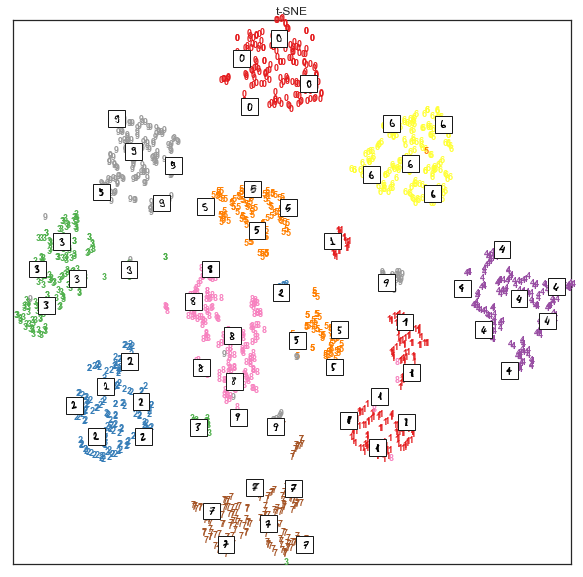

In [29]:
plot_embedding(mnist_tsne, "t-SNE")
plt.show()